## Import Libraries

In [13]:
import numpy as np
import pandas as pd
from PIL import Image # convert images into arrays
import seaborn as sns
import wordcloud

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

## Fetching Data

In [3]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
df_can.set_index('Country', inplace=True)

## Waffle Charts

In [6]:
df_dns = df_can.loc[["Denmark", "Norway", "Sweden"], :]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


### Step 1: Determining the proportion of each category with respect to the total

In [7]:
total_values = df_dns["Total"].sum()
category_proportions = df_dns["Total"] / total_values

pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


### Step 2: Defining the overall size of the waffle chart

In [8]:
width = 40
height = 10
total_num_tiles = width * height
total_num_tiles

400

### Step 3: Using the proportion of each category to determine its respective number of tiles

In [9]:
tiles_per_category = (total_num_tiles * category_proportions).round().astype(int)
tiles_per_category

Country
Denmark    129
Norway      77
Sweden     194
Name: Total, dtype: int32

### Step 4: Creating a matrix the resembles the waffle chart

In [10]:
waffle_chart = np.zeros((height, width), dtype=np.uint)

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > np.sum(tiles_per_category[0:category_index]):
            category_index += 1

        waffle_chart[row, col] = category_index

waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Step 5: Map the waffle chart matrix into a visual

<Figure size 640x480 with 0 Axes>

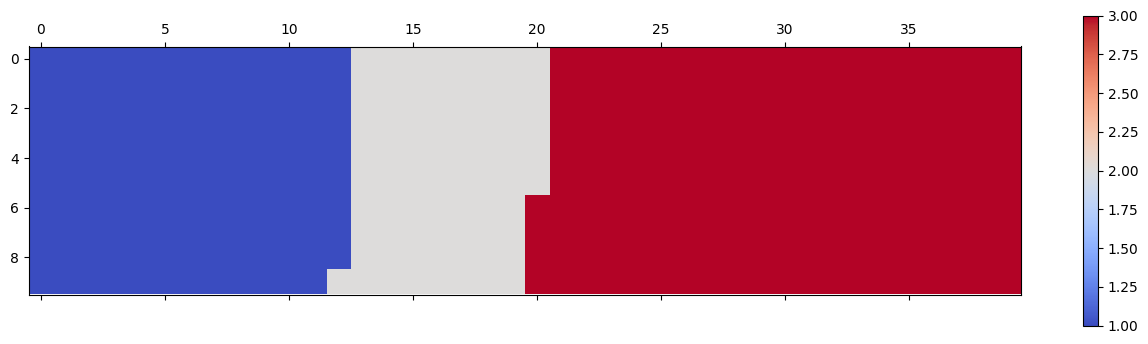

In [11]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

### Step 6: Prettify the chart

<Figure size 640x480 with 0 Axes>

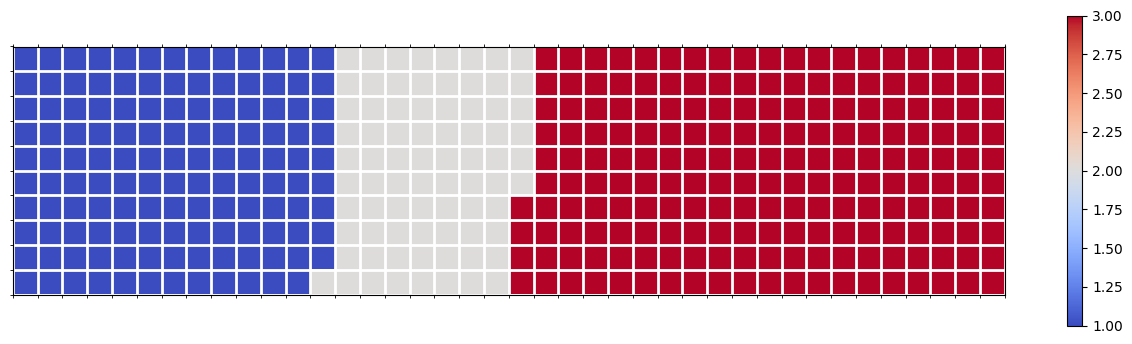

In [12]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

### Step 7: Create a legend and add it to chart

<Figure size 640x480 with 0 Axes>

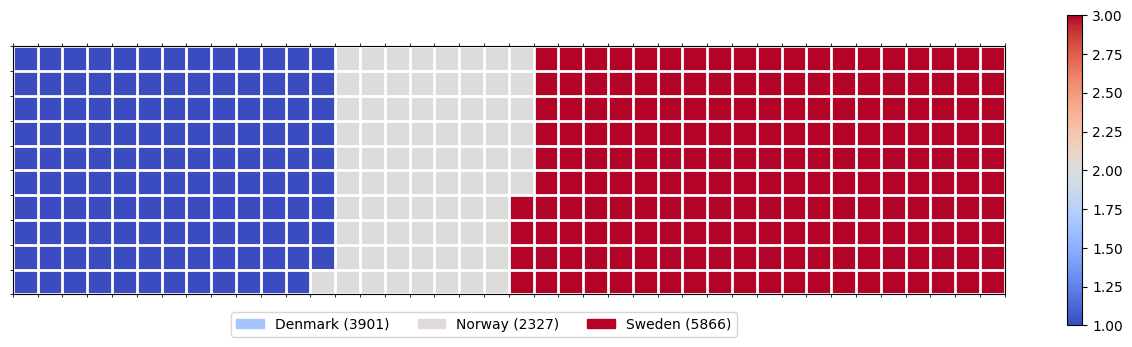

In [14]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns["Total"])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + " (" + str(df_dns["Total"][i]) + ")"
    color_val = colormap(float(values_cumsum[i]) / total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(
    handles=legend_handles,
    loc="lower center",
    ncol=len(df_dns.index.values),
    bbox_to_anchor=(0.0, -0.2, 0.95, 0.1),
)
plt.show()

In [15]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=""):
    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height  # total number of tiles
    print("Total number of tiles is", total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [
        round(proportion * total_num_tiles) for proportion in category_proportions
    ]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dns.index.values[i] + ": " + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == "%":
            label_str = category + " (" + str(values[i]) + value_sign + ")"
        else:
            label_str = category + " (" + value_sign + str(values[i]) + ")"

        color_val = colormap(float(values_cumsum[i]) / total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc="lower center",
        ncol=len(categories),
        bbox_to_anchor=(0.0, -0.2, 0.95, 0.1),
    )
    plt.show()

['Denmark' 'Norway' 'Sweden']
Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

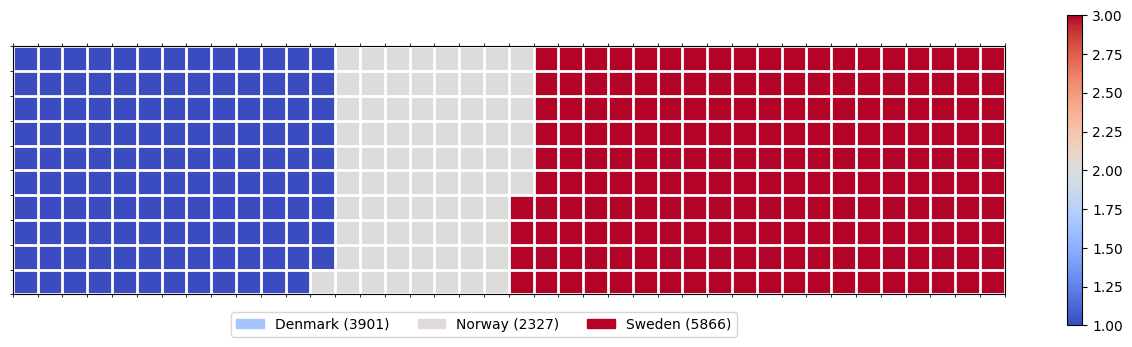

In [17]:
width = 40
height = 10
categories = df_dns.index.values
print(categories)
values = df_dns['Total']
colormap = plt.cm.coolwarm

create_waffle_chart(categories, values, height, width, colormap)

In [ ]:
# pip install pywaffle

In [19]:
from pywaffle import Waffle

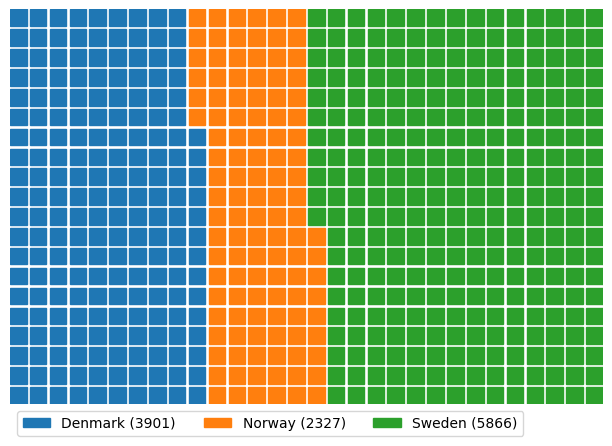

In [28]:
# Set up the Waffle chart figure

fig = plt.figure(
    FigureClass=Waffle,
    rows=20,
    columns=30,  # pass the number of rows and columns for the waffle
    values=df_dns["Total"],  # pass the data to be used for display
    cmap_name="tab10",  # color scheme
    legend={
        "labels": [f"{k} ({v})" for k, v in zip(df_dns.index.values, df_dns.Total)],
        "loc": "lower left",
        "bbox_to_anchor": (0, -0.1),
        "ncol": 3,
    }
    # notice the use of list comprehension for creating labels
    # from index and total of the dataset
)

# Display the waffle chart
plt.show()

## Word Clouds

In [29]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
import urllib

alice_novel = (
    urllib.request.urlopen(
        "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt"
    )
    .read()
    .decode("utf-8")
)

In [31]:
stopwords = set(STOPWORDS)

In [32]:
alice_wc = WordCloud()
alice_wc.generate(alice_novel)

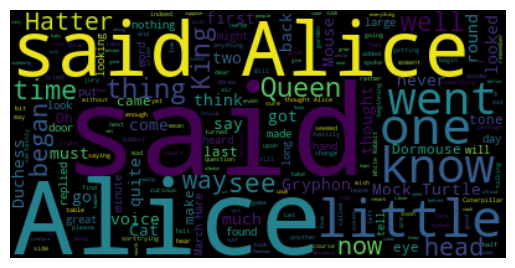

In [35]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

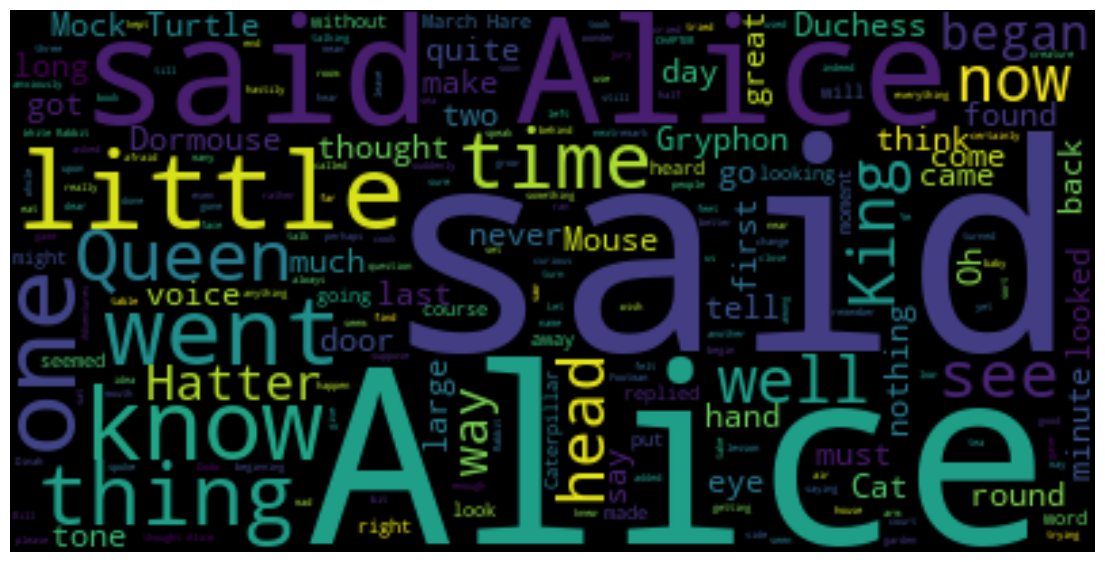

In [36]:
# said is not really an informative word
stopwords.add("said")
alice_wc.generate(alice_novel)
fig = plt.figure(figsize=(14, 18))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
# save mask to alice_mask
alice_mask = np.array(
    Image.open(
        urllib.request.urlopen(
            "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png"
        )
    )
)

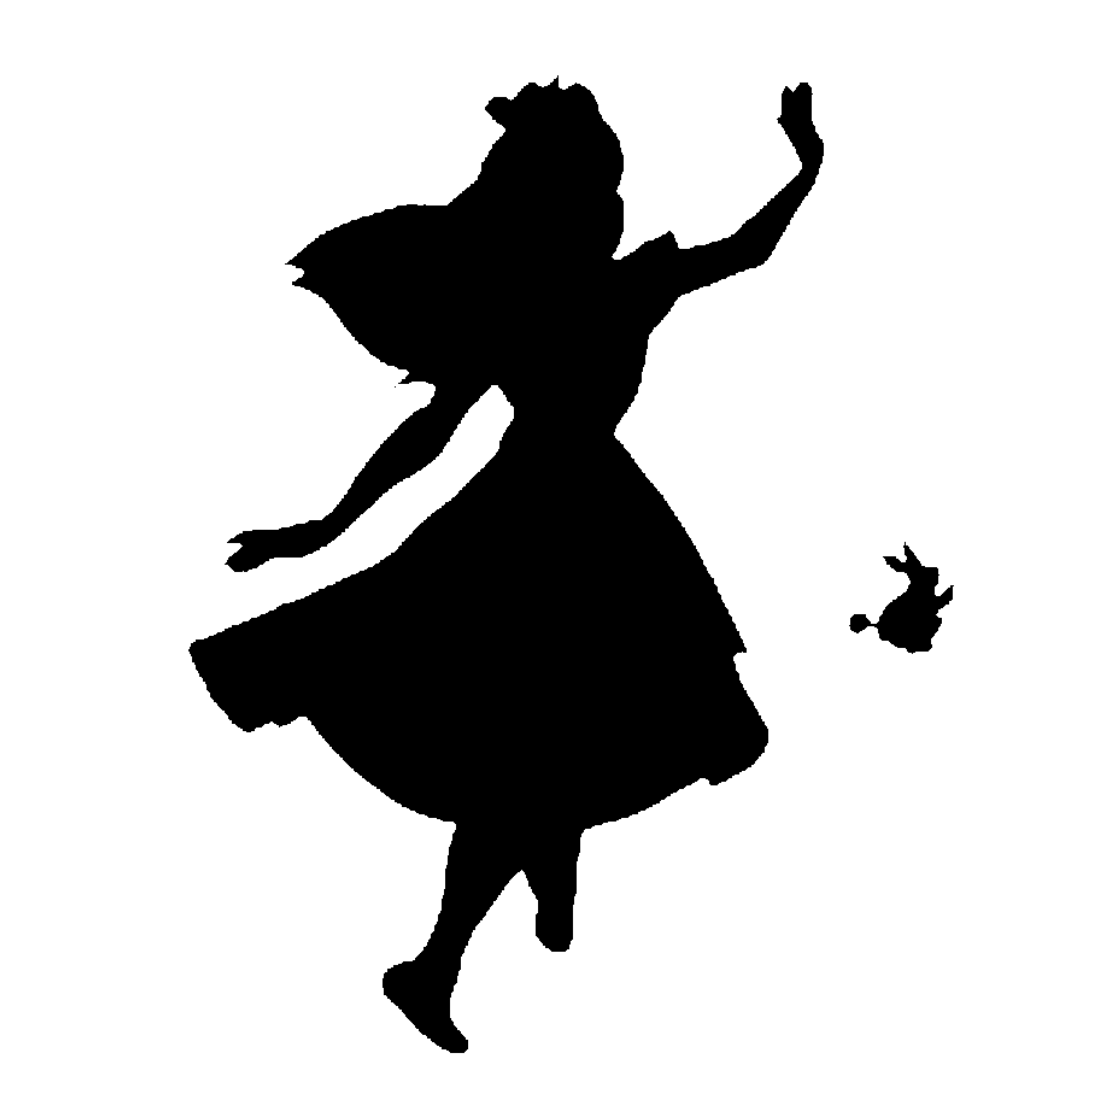

In [38]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

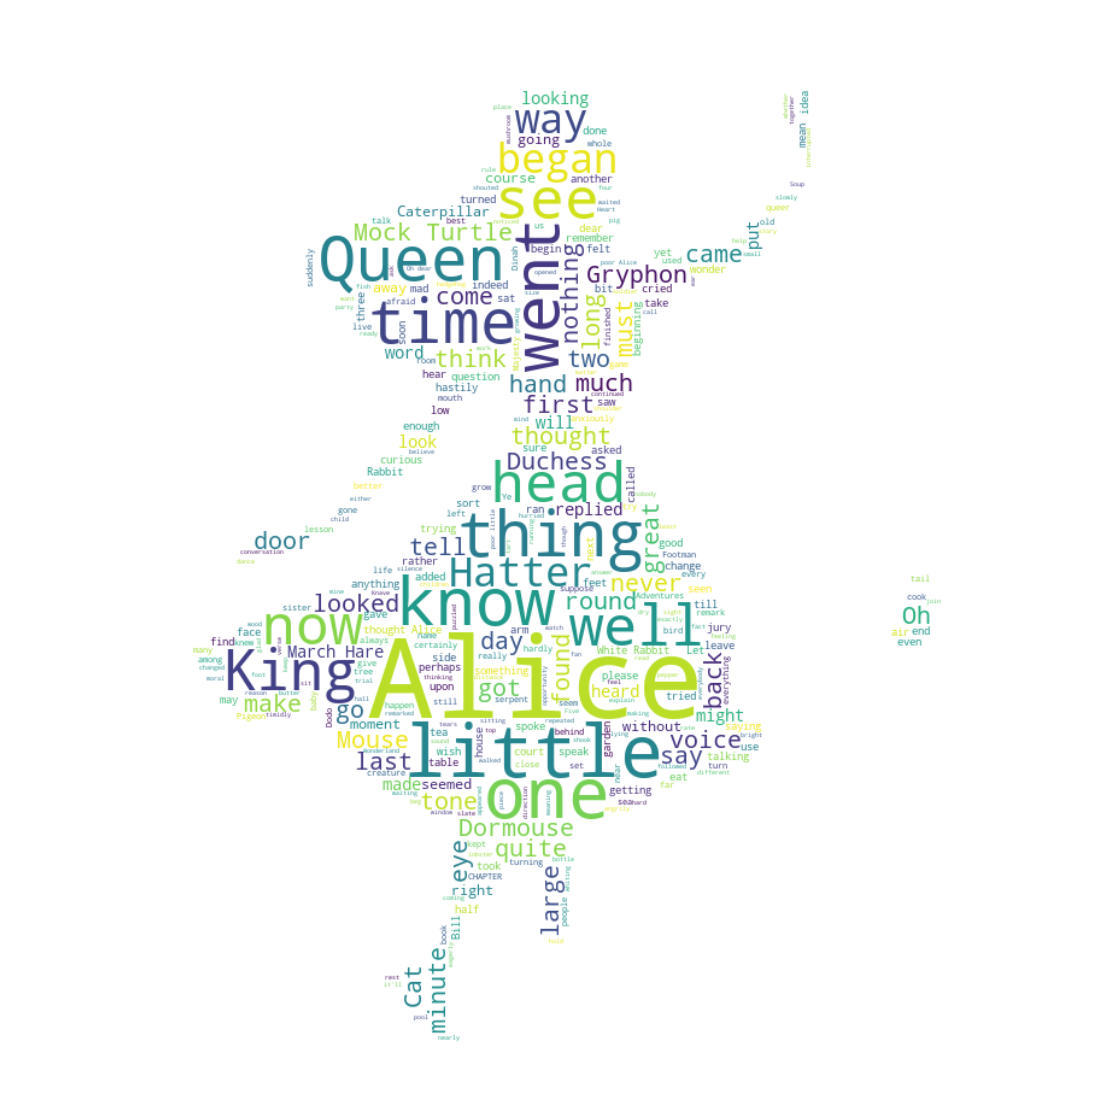

In [39]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color="white", max_words=2000, mask=alice_mask, stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Plotting with Seaborn

### Categorical Plots

<Axes: xlabel='Continent', ylabel='count'>

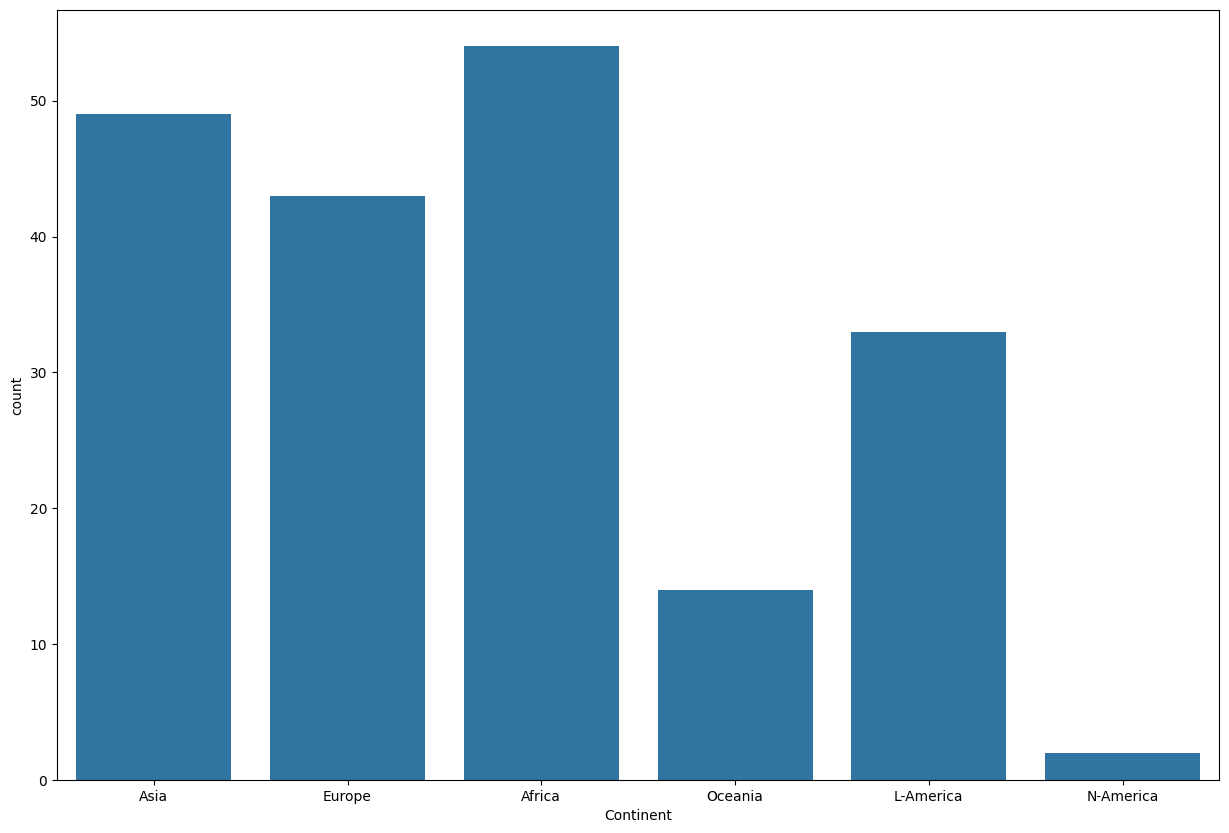

In [41]:
df_can1 = df_can.replace("Latin America and the Caribbean", "L-America")
df_can1 = df_can1.replace("Northern America", "N-America")

plt.figure(figsize=(15, 10))
sns.countplot(x="Continent", data=df_can1)

### Barplot

<Axes: xlabel='Continent', ylabel='Total'>

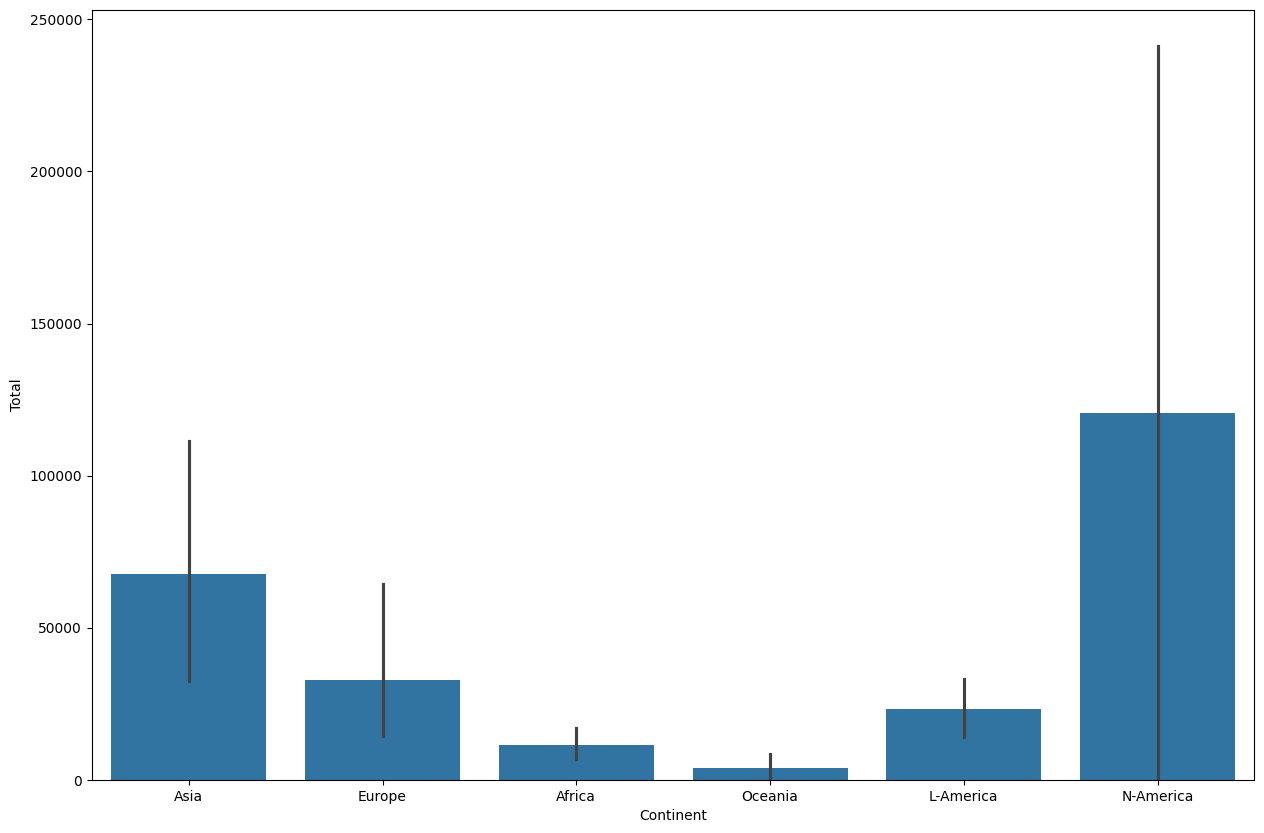

In [42]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Continent", y="Total", data=df_can1)

### Regression Plot

In [44]:
years = list(map(str, range(1980, 2014)))

df_total = pd.DataFrame(df_can[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace=True)
df_total.columns = ["year", "total"]
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


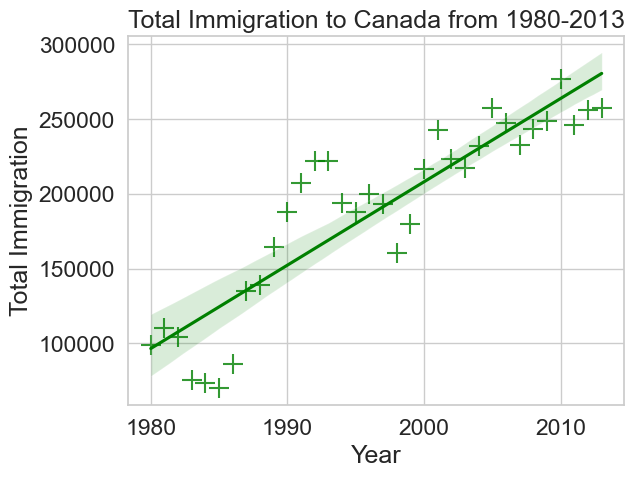

In [51]:
ax = sns.regplot(
    x="year",
    y="total",
    data=df_total,
    color="green",
    marker="+",
    scatter_kws={"s": 200},
)
ax.set(xlabel="Year", ylabel="Total Immigration")
ax.set_title("Total Immigration to Canada from 1980-2013")
plt.show()